In [1]:
#from skimage.measure import structural_similarity as ssim
from skimage.measure import compare_ssim as ssim
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np
import cv2

from os import listdir
from os.path import isfile, join

In [2]:
instagram_imgs = []
instagram_img_dir = './instagram/instagram_images'
for f in listdir(instagram_img_dir):
    if isfile(join(instagram_img_dir, f)):
        #print(join(instagram_img_dir, f))
        instagram_imgs.append(join(instagram_img_dir, f))
    #print(f)
#onlyfiles = [f for f in listdir(mypath) if isfile(join(mypath, f))]
#print(instagram_imgs)

In [3]:
instagram_imgs.sort()
len(instagram_imgs)

101

In [4]:
facebook_imgs = []
facebook_img_dir = './facebook_images'
for f in listdir(facebook_img_dir):
    if isfile(join(facebook_img_dir, f)):
        #print(join(facebook_img_dir, f))
        facebook_imgs.append(join(facebook_img_dir, f))

In [5]:
facebook_imgs.sort()
len(facebook_imgs) 

2265

In [10]:
def mse(imageA, imageB):
    # the 'Mean Squared Error' between the two images is the
    # sum of the squared difference between the two images;
    # NOTE: the two images must have the same dimension
    err = np.sum((imageA.astype("float") - imageB.astype("float")) ** 2)
    err /= float(imageA.shape[0] * imageA.shape[1])

    # return the MSE, the lower the error, the more "similar"
    # the two images are
    return err
 
def compare_images(imageA, imageB, title):
    # compute the mean squared error and structural similarity
    # index for the images
    mm = mse(imageA, imageB)
    ss = ssim(imageA, imageB)
    
    #print(mm, ss)
    return mm, ss
    # setup the figure
    
    fig = plt.figure(title)
    plt.suptitle("MSE: %.2f, SSIM: %.2f" % (m, s))

    # show first image
    ax = fig.add_subplot(1, 2, 1)
    plt.imshow(imageA, cmap = plt.cm.gray)
    plt.axis("off")
 
    # show the second image
    ax = fig.add_subplot(1, 2, 2)
    plt.imshow(imageB, cmap = plt.cm.gray)
    plt.axis("off")
 
    # show the images
    plt.show()
    
    return m, s

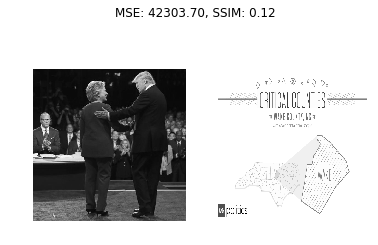

In [22]:
ins_img = cv2.imread('./instagram/instagram_images/007.jpg')
fb_img = cv2.imread('./facebook_images/0601_219367258105115_1286875358020961.jpg')

resized_fb_img = cv2.resize(fb_img, (ins_img.shape[1], ins_img.shape[0]))
        
gray_ins_img = cv2.cvtColor(ins_img, cv2.COLOR_BGR2GRAY)
gray_fb_img = cv2.cvtColor(resized_fb_img, cv2.COLOR_BGR2GRAY)

mm, ss = compare_images(gray_ins_img, gray_fb_img, 'compare')


In [11]:
fb_posts = pd.read_csv('./2016-10-facebook-fact-check/facebook-fact-check.csv')
fb_posts
#fb_posts.loc[0, ['Rating']]

,account_id,post_id,Category,Page,Post URL,Date Published,Post Type,Rating,Debate,share_count,reaction_count,comment_count
0,184096565021911,1035057923259100,mainstream,ABC News Politics,https://www.facebook.com/ABCNewsPolitics/posts...,2016-09-19,video,no factual content,NaN,NaN,146.0,15.0
1,184096565021911,1035269309904628,mainstream,ABC News Politics,https://www.facebook.com/ABCNewsPolitics/posts...,2016-09-19,link,mostly true,NaN,1.0,33.0,34.0
2,184096565021911,1035305953234297,mainstream,ABC News Politics,https://www.facebook.com/ABCNewsPolitics/posts...,2016-09-19,link,mostly true,NaN,34.0,63.0,27.0
3,184096565021911,1035322636565962,mainstream,ABC News Politics,https://www.facebook.com/ABCNewsPolitics/posts...,2016-09-19,link,mostly true,NaN,35.0,170.0,86.0
4,184096565021911,1035352946562931,mainstream,ABC News Politics,https://www.facebook.com/ABCNewsPolitics/posts...,2016-09-19,video,mostly true,NaN,568.0,3188.0,2815.0
5,184096565021911,1035366579894901,mainstream,ABC News Politics,https://www.facebook.com/ABCNewsPolitics/posts...,2016-09-19,link,mostly true,NaN,23.0,28.0,21.0
6,184096565021911,1035411183223774,mainstream,ABC News Politics,https://www.facebook.com/ABCNewsPolitics/posts...,2016-09-19,video,mostly true,NaN,46.0,409.0,105.0
7,184096565021911,1035430716555154,mainstream,ABC News Politics,https://www.facebook.com/ABCNewsPolitics/posts...,2016-09-19,link,mostly true,NaN,7.0,62.0,64.0
8,184096565021911,1035451683219724,mainstream,ABC News Politics,https://www.facebook.com/ABCNewsPolitics/posts...,2016-09-19,link,mostly true,NaN,7.0,39.0,6.0
9,184096565021911,1035453279886231,mainstream,ABC News Politics,https://www.facebook.com/ABCNewsPolitics/posts...,2016-09-19,video,mostly true,NaN,152.0,278.0,59.0


In [8]:
file = open('instagram_facebook2.csv', 'w')

for instagram_img in instagram_imgs:
    #fb_idx = 0;
    for facebook_img in facebook_imgs:
        #ins_img = cv2.imread(instagram_img)
        #fb_img = cv2.imread(facebook_img)
        #print('-----------------------')
        #print(instagram_img)
        #print(facebook_img)
        ins_img = cv2.imread(instagram_img)
        fb_img = cv2.imread(facebook_img)
        fb_file = facebook_img.split('/')[2]
        fb_idx = int(fb_file.split('_')[0])
        #print(fb_idx)
                
        rating = fb_posts.loc[fb_idx, ['Rating']]['Rating']
        post_id = fb_posts.loc[fb_idx, ['post_id']]['post_id']
                
        print(instagram_img, facebook_img, fb_idx, post_id, rating)
        
        if fb_img is not None:
            resized_fb_img = cv2.resize(fb_img, (ins_img.shape[1], ins_img.shape[0]))
        
            gray_ins_img = cv2.cvtColor(ins_img, cv2.COLOR_BGR2GRAY)
            gray_fb_img = cv2.cvtColor(resized_fb_img, cv2.COLOR_BGR2GRAY)

            mm, ss = compare_images(gray_ins_img, gray_fb_img, 'compare')
            data = "%s, %s, %d, %s, %s, %f, %f\n" % (instagram_img, facebook_img, fb_idx, post_id, rating, mm, ss)
            #compare_images(gray_ins_img, gray_fb_img, 'compare')

            file.write(data)
            
        #fb_idx = fb_idx + 1
        
file.close()

./instagram/instagram_images/001.jpg ./facebook_images/0000_184096565021911_1035057923259100.jpg 0 1035057923259100 no factual content
./instagram/instagram_images/001.jpg ./facebook_images/0001_184096565021911_1035269309904628.jpg 1 1035269309904628 mostly true
./instagram/instagram_images/001.jpg ./facebook_images/0002_184096565021911_1035305953234297.jpg 2 1035305953234297 mostly true
./instagram/instagram_images/001.jpg ./facebook_images/0003_184096565021911_1035322636565962.jpg 3 1035322636565962 mostly true
./instagram/instagram_images/001.jpg ./facebook_images/0004_184096565021911_1035352946562931.jpg 4 1035352946562931 mostly true
./instagram/instagram_images/001.jpg ./facebook_images/0005_184096565021911_1035366579894901.jpg 5 1035366579894901 mostly true
./instagram/instagram_images/001.jpg ./facebook_images/0006_184096565021911_1035411183223774.jpg 6 1035411183223774 mostly true
./instagram/instagram_images/001.jpg ./facebook_images/0007_184096565021911_1035430716555154.jpg 

KeyboardInterrupt: 

In [ ]:
ins_img = cv2.imread('./instagram/instagram_images/001.jpg')
fb_img = cv2.imread('./images/021_184096565021911_1035627049868854.jpg')
print(fb_img)
print(fb_img.shape)
#resized_fb_img = cv2.resize(fb_img, (ins_img.shape[1], ins_img.shape[0]))

In [ ]:
fb_img = cv2.imread('./images/804_135665053303678_551830561687123.jpg')
plt.imshow(fb_img)
plt.show()

In [ ]:
fb_img.shape

In [ ]:
ins_img = cv2.imread('./instagram/instagram_images/001.jpg')
plt.imshow(ins_img)
plt.show()

In [ ]:
ins_img.shape

In [ ]:
resized_img = cv2.resize(fb_img, (ins_img.shape[1], ins_img.shape[0]))

In [ ]:
resized_img.shape

In [ ]:
plt.imshow(resized_img)
plt.show()

In [16]:
fb_file = './facebook_images/0076_184096565021911_1037352739696285.jpg'.split('/')

In [20]:
fb = fb_file[2].split('_')
fb

['0076', '184096565021911', '1037352739696285.jpg']

In [21]:
fb_idx = int(fb[0])

In [22]:
print(fb_idx)

76
